# Verify four point interpolation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm

In [11]:
def fourpoint(a0,a1,b0,b1,wr,wc) :
    return a0+wc*(a1-a0)+wr*(wc*(a0-a1-b0+b1) + b0 -a0) 
 #   return a+wc*(b-a)+wr*(wc*(a-b-c+d) + c -a)

In [12]:
xx=np.linspace(0,1,21)
x,y=np.meshgrid(xx,xx)

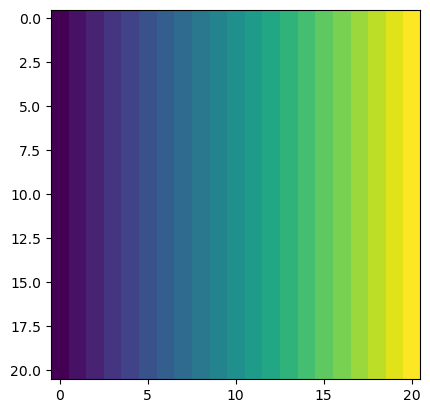

In [13]:
v=fourpoint(1,1,2,2,x,y)
plt.imshow(v)

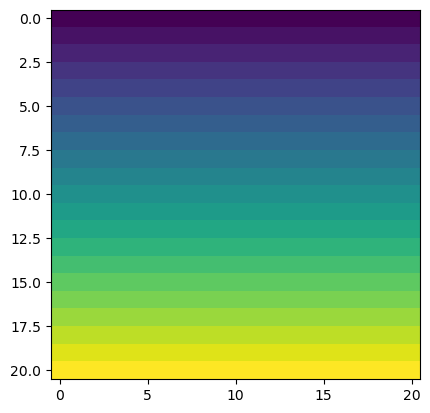

In [14]:
v=fourpoint(1,2,1,2,x,y)
plt.imshow(v)

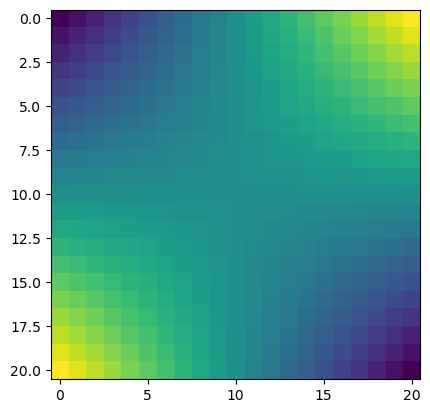

In [15]:
v=fourpoint(1,2,2,1,x,y)
plt.imshow(v)

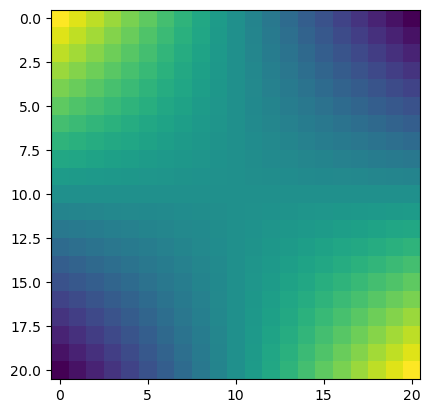

In [16]:
v=fourpoint(2,1,1,2,x,y)
plt.imshow(v)

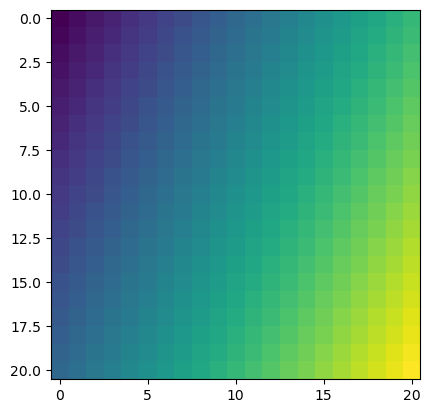

In [18]:
v=fourpoint(1,2,3,4,x,y)
plt.imshow(v)

# Performance check

In [1]:
import sys
sys.path.append('../../../../../scripts/python/')
import amglib.readers as rd

In [18]:
nn=rd.read_image('/Users/Shared/Data/Budha/recon/top-head/head_nearest_0605.tif')
bl=rd.read_image('/Users/Shared/Data/Budha/recon/top-head/head_linear_0605.tif')
par=rd.read_image('/Users/Shared/Data/Budha/recon/top-head/head_parallel_0605.tif')

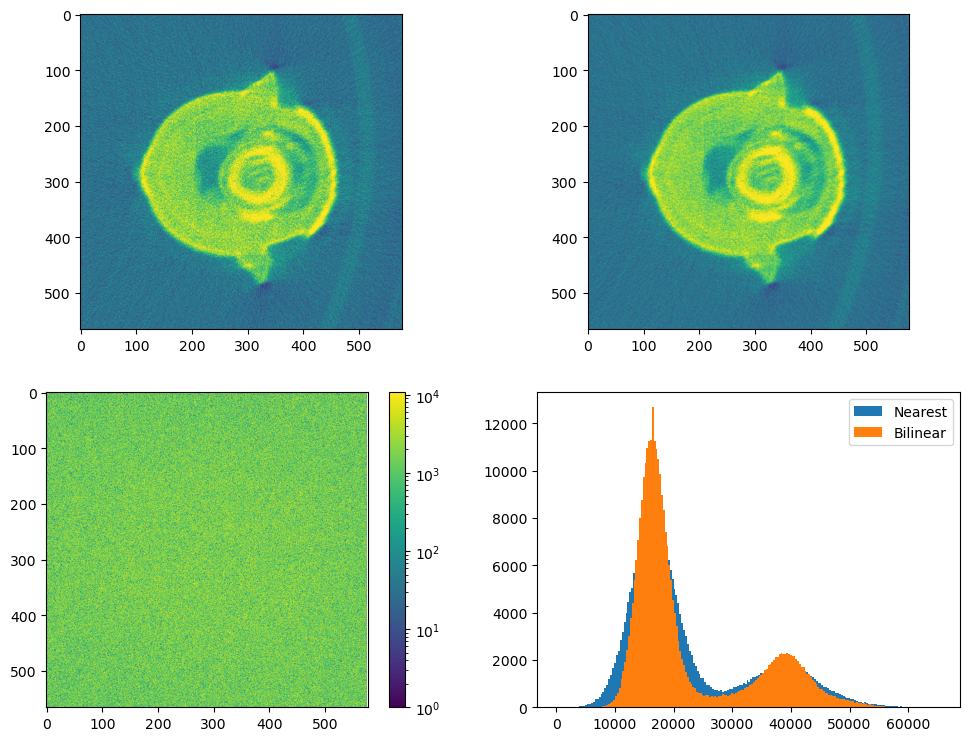

In [24]:
fig,ax = plt.subplots(2,2,figsize=[12,9])
ax=ax.ravel()
bins=200
m=bl.mean()
s=2.5*np.std(bl)
#lims = [bl.min(), bl.max()]
lims=[m-s,m+s]
ax[0].imshow(nn,vmin=lims[0],vmax=lims[1])
ax[1].imshow(bl,vmin=lims[0],vmax=lims[1])
a2=ax[2].imshow(np.abs(nn-bl),norm=LogNorm())
fig.colorbar(a2,ax=ax[2])
_ = ax[3].hist(nn.ravel(),bins=bins,label='Nearest')
_ = ax[3].hist(bl.ravel(),bins=bins,label='Bilinear')
ax[3].legend()

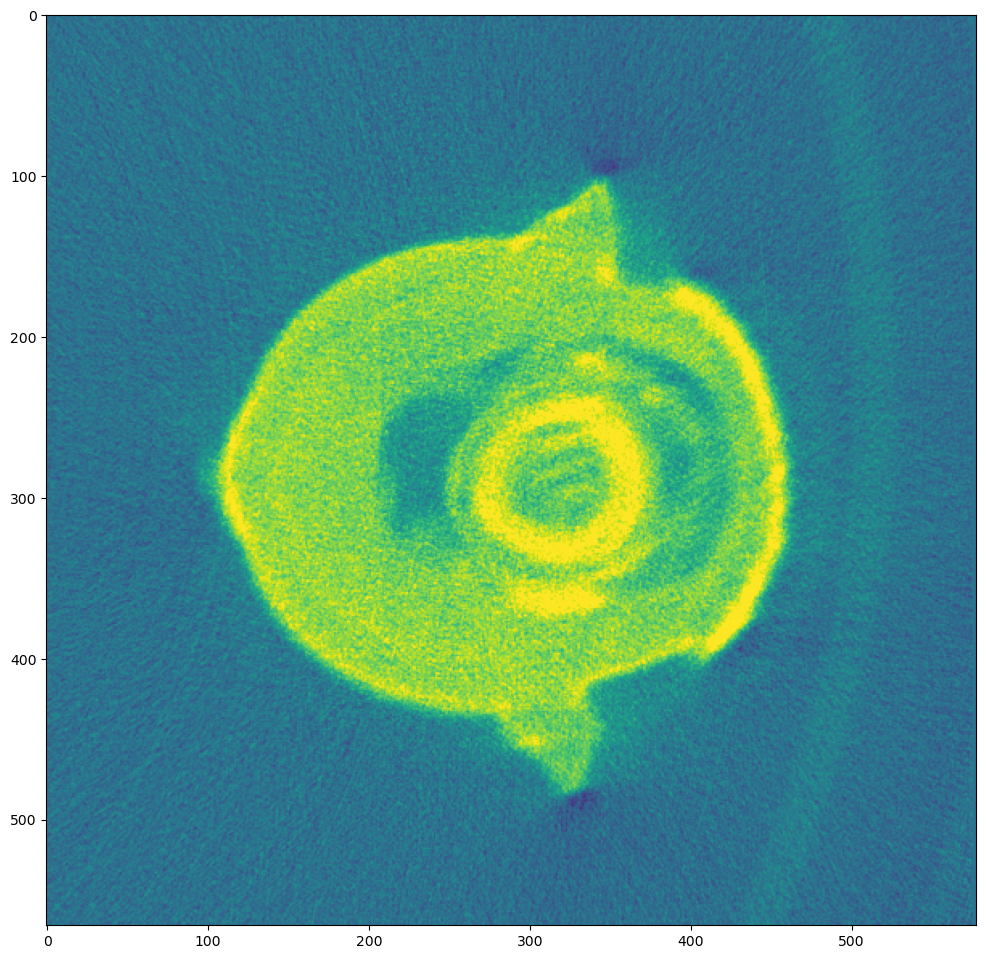

In [25]:
_,ax =plt.subplots(1,figsize=[12,12])
plt.imshow(bl,vmin=lims[0],vmax=lims[1])

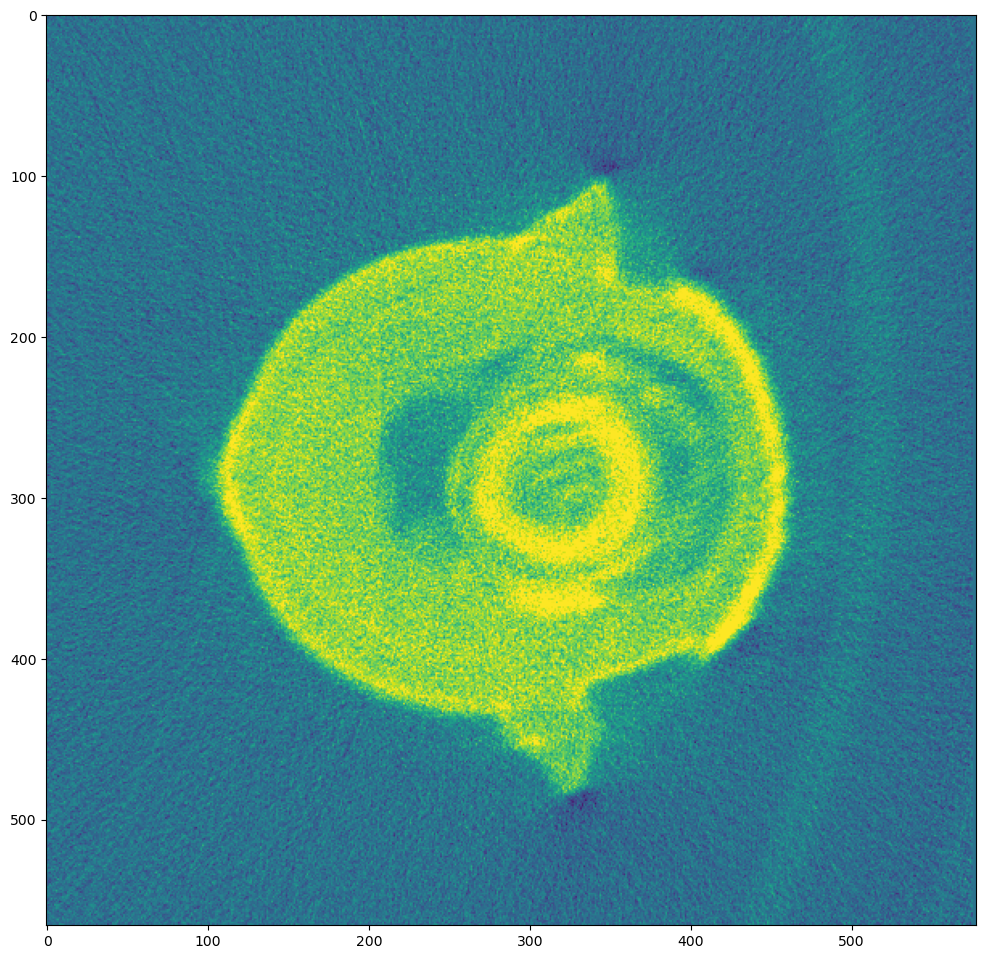

In [26]:
_,ax =plt.subplots(1,figsize=[12,12])
plt.imshow(nn,vmin=lims[0],vmax=lims[1])

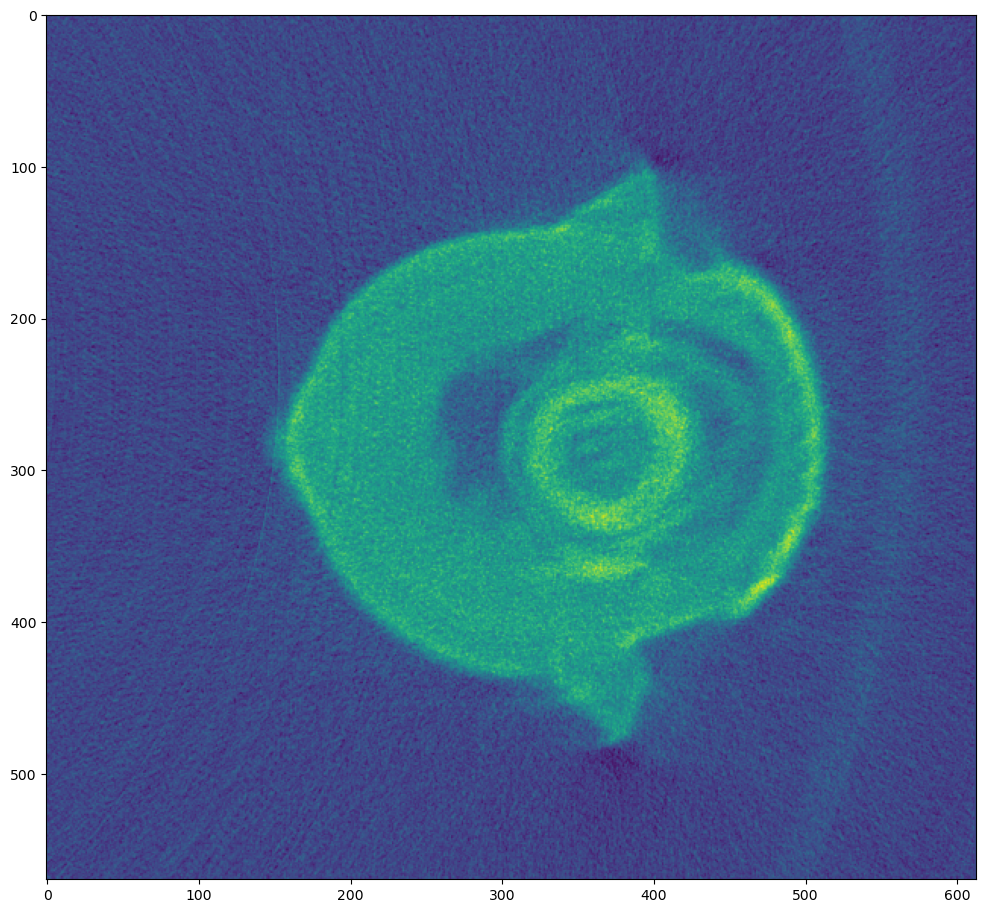

In [19]:
_,ax =plt.subplots(1,figsize=[12,12])
plt.imshow(par,vmin=lims[0],vmax=lims[1])